# Friday, February 17, 2017

## Goal for today - Get more hands-on practice with linear regression

I am following this tutorial - http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [55]:
dataset = load_boston()

In [56]:
dataset.data.shape

(506, 13)

In [57]:
#What are the feature names?
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [58]:
boston = pd.DataFrame(dataset.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
boston.columns = dataset.feature_names

In [60]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
boston["Price"] = dataset.target

In [62]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
#Now to use a Linear Regression object
X = boston.drop("Price", axis=1) #I need to train on everything except the Price column
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
y = boston.Price

In [66]:
regr = LinearRegression()

In [67]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
print("Intercept is : ", regr.intercept_)
print("Coefficients are : ", regr.coef_)

Intercept is :  36.4911032804
Coefficients are :  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [70]:
#There are 13 coefficients, which makes sense. (1 for each feature)

In [74]:
for num in range(13):
    print(X.columns[num], regr.coef_[num])

CRIM -0.10717055656
ZN 0.0463952195298
INDUS 0.0208602395322
CHAS 2.68856139932
NOX -17.7957586603
RM 3.80475246026
AGE 0.00075106170332
DIS -1.47575879652
RAD 0.305655038339
TAX -0.0123293463053
PTRATIO -0.953463554691
B 0.00939251272219
LSTAT -0.525466632901


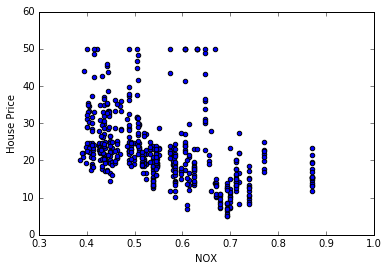

In [77]:
plt.scatter(boston.NOX, boston.Price)
plt.xlabel("NOX")
plt.ylabel("House Price")
plt.show()

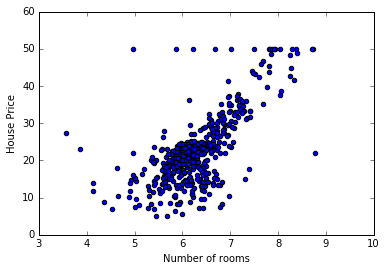

In [79]:
plt.scatter(boston.RM, boston.Price)
plt.xlabel("Number of rooms")
plt.ylabel("House Price")
plt.show()

In [85]:
target_values = boston["Price"]

In [86]:
predictions = regr.predict(X)
predictions.shape

(506,)

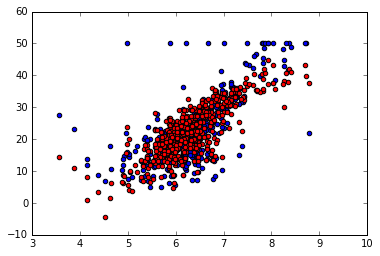

In [88]:
plt.scatter(boston.RM, boston.Price, c="b")
plt.scatter(boston.RM, predictions, c="r")
plt.show()

## I did not split the data into training and testing portions. I will do that next